In [1]:
import json
from collections import Counter
from datetime import datetime
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading JSON file in chunks
try:
    review = pd.read_json("E:/nethari/Downloads/YEAR 3/Deep Learning/dataset files/yelp_academic_dataset_review.json", chunksize=20000, lines=True)
    review_chunk = next(review)
    print(review_chunk.head())
except FileNotFoundError:
    print("File not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

   stars  useful  funny  cool  \
0      3       0      0     0   
1      5       1      0     1   
2      3       0      0     0   
3      5       1      0     1   
4      4       1      0     1   

                                                text                date  
0  If you decide to eat here, just be aware it is... 2018-07-07 22:09:11  
1  I've taken a lot of spin classes over the year... 2012-01-03 15:28:18  
2  Family diner. Had the buffet. Eclectic assortm... 2014-02-05 20:30:30  
3  Wow!  Yummy, different,  delicious.

In [3]:
#Dropping review id, useful, funny, cool, text and ate from review chunk dataframe
review_chunk = review_chunk.drop(['review_id', 'useful', 'funny', 'cool', 'text', 'date'], axis=1)
print(review_chunk.head())

                  user_id             business_id  stars
0  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw      3
1  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ      5
2  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A      3
3  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA      5
4  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ      4


In [4]:
#Removing duplicates from review chunk dataframe
duplicate_rows = review_chunk[review_chunk.duplicated()]
print("Duplicate Rows except first occurrence:")
print(duplicate_rows)
review_chunk = review_chunk.drop_duplicates()

Duplicate Rows except first occurrence:
                      user_id             business_id  stars
6184   A_TznMSVvVb6tbiGSvRQ_Q  G-zzByEfv2oqjcxYmPsjtA      5
6834   s9ZHbQAJs8brdlRcU36znw  9TJzfMc4gEKSUxfnGcj6dw      5
9839   LEyRdfEh33INkU_qK3-FAQ  xJyp6RLqNRv3tSu6njPKxQ      3
10392  pg0GI_LBpsX06a8eN7Ff5A  0qu0fNTOsSmuREYVIMPuIQ      4
11464  OxOEyH0OxKH4e3E6xqy9-Q  VgGITb54IIb1G0gSVt3gkw      4
12546  n3Gg5mIokBirc8s_unINnQ  y--UQiSyVPAmWjRkZ9tdPQ      4
12776  J8QE0UJ7yhHB9m_SomQAgA  TRtcUUdBfO9e7wBoJLH9NA      5
13674  FSb3LhuLAQVYK7Tj82Jzog  XdcWCEhxUtBcSyn-DiidPw      1
13745  mYCvAkZ1-67z9PAGdlINng  54NQk8KBYd8lMD3bLVbrAQ      1
14694  y4EOqN--vgyMGm5Byj_HIQ  5NSA0-aOjOVQWJYIr8hA-Q      5
15091  2anfbsmeoqeMYCiNwUow9Q  PY9GRfzr4nTZeINf346QOw      5
15213  _BcWyKQL16ndpBdggh2kNA  h1qdksqlwGpmp_Id8j5CXQ      4
15493  zcYZgNeJHpKCSBRwh6WskQ  lEOxwatxwXaCi8lPUTFKRQ      5
15704  0YyF7OrD2VEUVUiYmKZ8MA  NnlQhXtuVOVjUFYB1Hqp8Q      5
16647  Jt3GylPuH64uA3zTdbMdCg  nl_La1sCrZG0xq

In [5]:
# review chunk info
review_chunk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19981 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      19981 non-null  object
 1   business_id  19981 non-null  object
 2   stars        19981 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 624.4+ KB


In [6]:
business = pd.read_json("E:/nethari/Downloads/YEAR 3/Deep Learning/dataset files/yelp_academic_dataset_business.json", chunksize=10000, lines=True)
business_chunk = next(business)
print(business_chunk.head())

              business_id                      name  \
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2  tUFrWirKiKi_TAnsVWINQQ                    Target   
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   

                           address           city state postal_code  \
0           1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1  87 Grasso Plaza Shopping Center         Affton    MO       63123   
2             5255 E Broadway Blvd         Tucson    AZ       85711   
3                      935 Race St   Philadelphia    PA       19107   
4                    101 Walnut St     Green Lane    PA       18054   

    latitude   longitude  stars  review_count  is_open  \
0  34.426679 -119.711197    5.0             7        0   
1  38.551126  -90.335695    3.0            15        1   
2  32.223236 -110.880452    3.5            22        0   
3  39.9555

In [7]:
#will use business id and name columns, dropping other columns
business_chunk=business_chunk.drop(['address','city','state','postal_code','longitude','latitude','stars','review_count','is_open','attributes','categories','hours'], axis=1)
print(business_chunk.head())

              business_id                      name
0  Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ
1  mpf3x-BjTdTEA3yCZrAYPw             The UPS Store
2  tUFrWirKiKi_TAnsVWINQQ                    Target
3  MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries
4  mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery


In [8]:
min_user_id = review_chunk['user_id'].min()
min_user_id

'--4AjktZiHowEIBCMd4CZA'

In [9]:
# mapping numerical ids to original ids as it contains various characters and adding them to new columns
user_id_unique = review_chunk['user_id'].unique()
user_id_mapping = {user_id: idx for idx, user_id in enumerate(user_id_unique)}


review_chunk['user_id_new'] = review_chunk['user_id'].map(user_id_mapping)


busi_id_unique = review_chunk['business_id'].unique()
busi_id_mapping = {busi_id: idx for idx, busi_id in enumerate(busi_id_unique)}

review_chunk['busi_id_new'] = review_chunk['business_id'].map(busi_id_mapping)

In [10]:
#remove default indexes
review_chunk = review_chunk.reset_index(drop=True)
review_chunk.head()

,user_id,business_id,stars,user_id_new,busi_id_new
0,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0
1,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,1
2,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,2,2
3,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,3,3
4,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,4,4


In [11]:
#remove original id columns
data_df=review_chunk.drop(['user_id','business_id'], axis=1)
data_df

,stars,user_id_new,busi_id_new
0,3,0,0
1,5,1,1
2,3,2,2
3,5,3,3
4,4,4,4
...,...,...,...
19976,1,18242,3348
19977,4,18243,5548
19978,2,18244,61
19979,2,6786,5549


In [12]:
#Finding maximum and minimum user and business ids
min_user_id = data_df['user_id_new'].min()
max_user_id = data_df['user_id_new'].max()
min_busi_id = data_df['busi_id_new'].min()
max_busi_id = data_df['busi_id_new'].max()

In [13]:
print('min_user_id:', min_user_id)
print('max_user_id:', max_user_id)
print('min_busi_id:', min_busi_id)
print('max_busi_id:', max_busi_id)

min_user_id: 0
max_user_id: 18245
min_busi_id: 0
max_busi_id: 5549


In [14]:
data_df['stars'].describe()

count    19981.000000
mean         3.852510
std          1.349013
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: stars, dtype: float64

In [15]:
#Splitting data
from sklearn.model_selection import train_test_split

train, test = train_test_split(
    data_df, test_size=0.2, random_state=42)

print("testing data: ")
test.head()

testing data: 


,stars,user_id_new,busi_id_new
4013,1,3914,2301
2085,4,2053,1433
4772,1,4631,608
9109,5,8657,3738
19298,5,17661,757


In [16]:
print("training data: ")
train.head()

training data: 


,stars,user_id_new,busi_id_new
16590,1,15279,5087
19927,4,18201,2173
9658,5,9162,222
8132,4,7760,3
16024,4,14781,1097


SUPERVISED: REGRESSION BASED

In [17]:
from keras.models import Model
from keras.layers import Input, Embedding, Flatten, Concatenate, Dense
from keras.optimizers import Adam

def regressionModel(embedding_size = 64, classification = False):

    user_input = Input(shape=[1], name='user_id_new')
    embedding_user = Embedding(output_dim=embedding_size, input_dim=max_user_id + 1, input_length=1)(user_input)
    user_vec = Flatten()(embedding_user)

    business_input = Input(shape=[1], name='busi_id_new')
    embedding_busi = Embedding(output_dim=embedding_size, input_dim=max_busi_id + 1, input_length=1)(business_input)
    busi_vec = Flatten()(embedding_busi)

    concatenated = Concatenate()([user_vec, busi_vec])

    #adding fully-connected layers

    layer1 = Dense(128, activation='relu')(concatenated)
    layer2 = Dense(32, activation='relu')(layer1)
    output = Dense(1)(layer2)

    model1 = Model(inputs=[user_input, business_input], outputs=output)
    model1.compile(optimizer="adam", loss='mse')

    return model1

In [18]:
Model1 = regressionModel()

In [19]:
history = Model1.fit([train.user_id_new,train.busi_id_new],train.stars,batch_size=64,epochs=10,verbose=1)

Epoch 1/10
250/250 [==============================] - 4s 14ms/step - loss: 4.1246
Epoch 2/10
250/250 [==============================] - 3s 14ms/step - loss: 0.9870
Epoch 3/10
250/250 [==============================] - 3s 14ms/step - loss: 0.3727
Epoch 4/10
250/250 [==============================] - 3s 14ms/step - loss: 0.1679
Epoch 5/10
250/250 [==============================] - 3s 14ms/step - loss: 0.1162
Epoch 6/10
250/250 [==============================] - 3s 14ms/step - loss: 0.0913
Epoch 7/10
250/250 [==============================] - 3s 14ms/step - loss: 0.0773
Epoch 8/10
250/250 [==============================] - 3s 14ms/step - loss: 0.0686
Epoch 9/10
250/250 [==============================] - 3s 14ms/step - loss: 0.0604
Epoch 10/10
250/250 [==============================] - 3s 14ms/step - loss: 0.0556


Text(0, 0.5, 'Training Error')

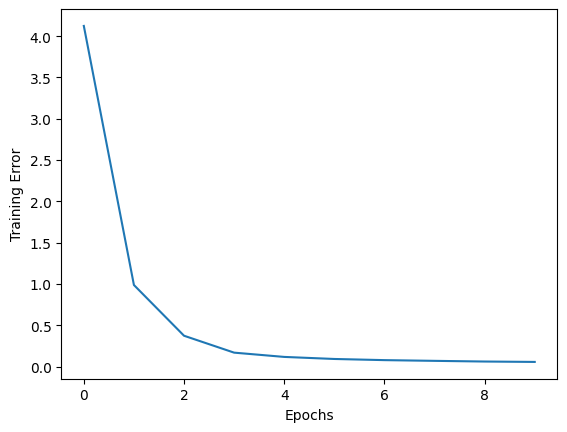

In [20]:
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Training Error')

In [21]:
#Evaluated using mean squared error (mse)
Model1.evaluate([test.user_id_new, test.busi_id_new], test.stars)

125/125 [==============================] - 0s 2ms/step - loss: 1.9058


1.905818223953247

In [22]:
test_loss = Model1.evaluate([test.user_id_new, test.busi_id_new], test.stars)
print('Test loss:', test_loss)

125/125 [==============================] - 0s 1ms/step - loss: 1.9058
Test loss: 1.905818223953247


In [23]:
#testing
predictions = Model1.predict([test.user_id_new.head(10), test.busi_id_new.head(10)])

for i in range(10):
    print(f"Prediction: {predictions[i][0]:.4f}, Actual: {test.stars.iloc[i]}")

1/1 [==============================] - 0s 114ms/step
Prediction: 4.0821, Actual: 1
Prediction: 3.7715, Actual: 4
Prediction: 2.7499, Actual: 1
Prediction: 4.2220, Actual: 5
Prediction: 4.5382, Actual: 5
Prediction: 2.2613, Actual: 4
Prediction: 3.5872, Actual: 5
Prediction: 3.5531, Actual: 5
Prediction: 3.3860, Actual: 1
Prediction: 4.1913, Actual: 5


In [24]:
# weights and shape
weights = Model1.get_weights()
[w.shape for w in weights]

user_embeddings = weights[0]
business_embeddings = weights[1]

busi_id = 2173
print(f"Name of business id={busi_id}: {business_chunk['name'][busi_id]}")

Name of business id=2173: The UPS Store


In [25]:
print(f"Embedding vector for business id={busi_id}")
print(business_embeddings[busi_id])
print("shape:", business_embeddings[busi_id].shape)

Embedding vector for business id=2173
[ 0.05877133  0.04501685 -0.01725506 -0.05025643 -0.06979165  0.02594703
  0.00293044  0.03660379  0.05149715 -0.01825316  0.00039851 -0.01656428
 -0.06293498  0.03793231  0.02969504  0.00657199  0.03146595  0.13885261
 -0.04135479  0.07031762 -0.00462869  0.06540851  0.01153204 -0.01723789
  0.087301    0.0370287   0.03796383 -0.07224352 -0.0232973   0.09620564
 -0.00881429 -0.04458182 -0.07194512  0.01056681 -0.01306996  0.05034458
  0.01044763  0.00068259 -0.08497465 -0.00541252  0.02081577 -0.04822538
  0.0073524   0.01707043 -0.05319215  0.04595457 -0.0397765  -0.00377649
  0.03741151 -0.00688529 -0.06224126 -0.06116797 -0.09481337 -0.07058259
  0.08134865  0.01840541  0.0476545   0.04561331 -0.04627911  0.01889746
 -0.00228962  0.04439778  0.09309176  0.08131935]
shape: (64,)


In [26]:
import numpy as np

EPSILON = 1e-07 
#defining cosine similarity function
def cosine_similarities(busi_id, business_embeddings):
    # Compute similarities between busi_id and all business embeddings
    query_vector = business_embeddings[busi_id]
    dot_products = np.dot(business_embeddings, query_vector)
    
    query_vector_norm = np.linalg.norm(query_vector)
    all_item_norms = np.linalg.norm(business_embeddings, axis=1)
    
    norm_products = query_vector_norm * all_item_norms
    cosine_similarities = dot_products / (norm_products + EPSILON)
    
    return cosine_similarities

similarities = cosine_similarities(2173, business_embeddings)
print(similarities)

[ 0.38937867 -0.45813793  0.12285512 ...  0.31355256  0.0801081
  0.00252671]


In [27]:
#defining most similar/top similar fnction
def most_similar(item_id, item_embeddings, titles, top_n=30):

    sims = cosine_similarities(item_id, item_embeddings)
    
    sorted_indexes = np.argsort(sims)[::-1]
    
    idxs = sorted_indexes[:top_n]
    
    return [(idx, titles.iloc[idx], sims[idx]) for idx in idxs]

business_chunk.reset_index(drop=True, inplace=True)

similar_items = most_similar(2173, business_embeddings, business_chunk["name"], top_n=10)
for idx, name, sim in similar_items:
    print(f"Index: {idx}, Name: {name}, Similarity: {sim}")

Index: 2173, Name: The UPS Store, Similarity: 0.999999463558197
Index: 3313, Name: The Spark, Similarity: 0.6275200247764587
Index: 3286, Name: Num Num Boba, Similarity: 0.6235862970352173
Index: 3971, Name: Juliet Personal Concierge, Similarity: 0.6158800721168518
Index: 2950, Name: La Spezia Italian Cafe, Similarity: 0.6154996752738953
Index: 4010, Name: Fred's, Similarity: 0.6103836297988892
Index: 3995, Name: New Image Cosmetic & Medical Centre, Similarity: 0.6049186587333679
Index: 777, Name: McDonald's, Similarity: 0.6047322154045105
Index: 4048, Name: Ocean Chiropractic & Wellness Center, Similarity: 0.6045320630073547
Index: 1198, Name: Penningtons, Similarity: 0.6028035283088684


c:\Users\ACER\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ACER\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ACER\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ACER\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kme

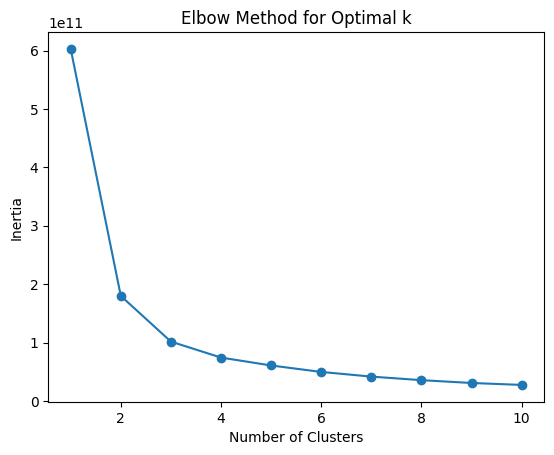

In [29]:
#Using elbow method to find no.of.clusters
from sklearn.cluster import KMeans

inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data_df)
    inertia.append(kmeans.inertia_)


plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

UNSUPERVISED: DEEP EMBEDDED CLUSTERING BASED

In [30]:
from keras.models import Model
from keras.layers import Input, Embedding, Flatten, Dense, Concatenate
from sklearn.cluster import KMeans
import numpy as np

user_input = Input(shape=(1,))
busi_input = Input(shape=(1,))

embeddingUser = Embedding(max_user_id + 1, 64)(user_input)
embeddingBusi = Embedding(max_busi_id + 1, 64)(busi_input)

embedding_user = Flatten()(embeddingUser)
embedding_busi = Flatten()(embeddingBusi)

concatenate = Concatenate()([embedding_user, embedding_busi])

# Encoder
encoded = Dense(128, activation='relu')(concatenate)
encoded = Dense(64, activation='relu')(encoded)
embedding = Dense(32, activation='relu')(encoded) 

# Clustering layer
clustering = Dense(3, activation='softmax')(embedding)

model = Model(inputs=[user_input, busi_input], outputs=[clustering])

model.compile(optimizer='adam', loss='kld')
history = model.fit([train.user_id_new,train.busi_id_new], [np.ones_like(train.user_id_new)], epochs=10, batch_size=64)


Epoch 1/10
250/250 [==============================] - 5s 16ms/step - loss: 3.2958
Epoch 2/10
250/250 [==============================] - 4s 15ms/step - loss: 3.2958
Epoch 3/10
250/250 [==============================] - 4s 16ms/step - loss: 3.2958
Epoch 4/10
250/250 [==============================] - 4s 15ms/step - loss: 3.2958
Epoch 5/10
250/250 [==============================] - 4s 16ms/step - loss: 3.2958
Epoch 6/10
250/250 [==============================] - 4s 15ms/step - loss: 3.2958
Epoch 7/10
250/250 [==============================] - 4s 15ms/step - loss: 3.2958
Epoch 8/10
250/250 [==============================] - 4s 15ms/step - loss: 3.2958
Epoch 9/10
250/250 [==============================] - 4s 15ms/step - loss: 3.2958
Epoch 10/10
250/250 [==============================] - 4s 14ms/step - loss: 3.2958


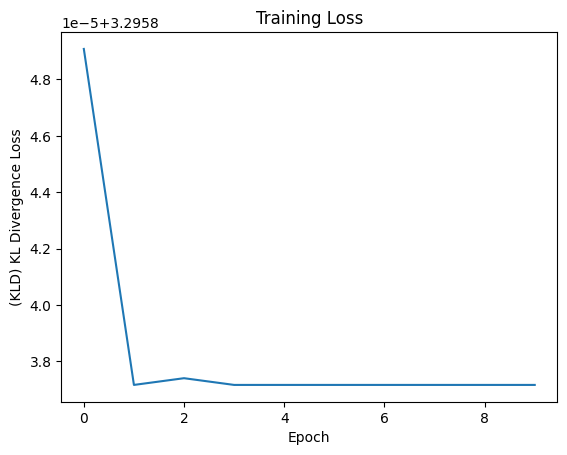

In [31]:
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('(KLD) KL Divergence Loss')
plt.show()

In [32]:
#evaluation done using KL Divergence Loss (KLD)
model.evaluate([test.user_id_new,test.busi_id_new],test.stars)

125/125 [==============================] - 0s 1ms/step - loss: 3.2958


3.295837163925171

In [33]:
# weights and shape
weights = model.get_weights()
[w.shape for w in weights]

user_embeddings = weights[0]
business_embeddings = weights[1]

busi_id = 2173
print(f"Name of business id={busi_id}: {business_chunk['name'][busi_id]}")

Name of business id=2173: The UPS Store


In [34]:
print(f"Embedding vector for business id={busi_id}")
print(business_embeddings[busi_id])
print("shape:", business_embeddings[busi_id].shape)

Embedding vector for business id=2173
[ 0.0442427  -0.00190441  0.01756036  0.02038994  0.02382015 -0.00837602
  0.04929071  0.0158596  -0.01823412 -0.04451939  0.00786523  0.03455016
 -0.0471162  -0.00717798  0.01600284  0.01617005 -0.04766953  0.04668885
 -0.0320657  -0.03141274 -0.04764104  0.0244962  -0.03254799 -0.03562871
  0.02665689  0.0482817  -0.04242814  0.02797771  0.04112677 -0.02491389
  0.01756225  0.02653272  0.04353496 -0.02939183  0.0112514  -0.01277198
 -0.04414108 -0.02687376  0.01961407 -0.01021225 -0.04628139  0.03375229
 -0.00598001  0.03295444 -0.01745192 -0.01457979  0.04852794  0.00065988
 -0.04761376  0.00780365 -0.00968675 -0.03097664  0.002559    0.04584677
  0.01469157  0.00267295 -0.04169283  0.0090557   0.00681893  0.00453183
  0.03461486  0.02202642  0.0160916  -0.03885233]
shape: (64,)


In [35]:
EPSILON = 1e-07 
def cosine_similarities(busi_id, business_embeddings):
    
    query_vector = business_embeddings[busi_id]
    dot_products = business_embeddings @ query_vector

    query_vector_norm = np.linalg.norm(query_vector)
    all_item_norms = np.linalg.norm(business_embeddings, axis=1)
    norm_products = query_vector_norm * all_item_norms
    return dot_products / (norm_products + EPSILON)


similarities = cosine_similarities(2173, business_embeddings)
similarities

array([ 0.00720419, -0.0959762 , -0.17994002, ...,  0.06456998,
       -0.18187019,  0.02862745], dtype=float32)

In [36]:
def most_similar(item_id, item_embeddings, titles, top_n=30):
    
    sims = cosine_similarities(item_id, item_embeddings)
    
    sorted_indexes = np.argsort(sims)[::-1]
    
    idxs = sorted_indexes[:top_n]
    
    return [(idx, titles.iloc[idx], sims[idx]) for idx in idxs]

business_chunk.reset_index(drop=True, inplace=True)

similar_items = most_similar(2173, business_embeddings, business_chunk["name"], top_n=10)
for idx, name, sim in similar_items:
    print(f"Index: {idx}, Name: {name}, Similarity: {sim}")

Index: 2173, Name: The UPS Store, Similarity: 0.9999982714653015
Index: 4764, Name: Audubon Aquarium of the Americas - Food Court, Similarity: 0.463095098733902
Index: 715, Name: Brooms N Buckets, Similarity: 0.4385693669319153
Index: 4134, Name: Advanced IPM, Similarity: 0.43279582262039185
Index: 1768, Name: King House Chinese Restaurant, Similarity: 0.4246600568294525
Index: 2192, Name: Racks For Cars, Similarity: 0.39693155884742737
Index: 942, Name: Golden Spirit Alpaca Ranch, Similarity: 0.393623024225235
Index: 122, Name: Subway, Similarity: 0.3740551471710205
Index: 3229, Name: Courtyard by Marriott Philadelphia Plymouth Meeting, Similarity: 0.36510077118873596
Index: 2017, Name: Enterprise Rent-A-Car, Similarity: 0.3633929193019867
